In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [8]:
url="https://raw.github.com/Bviveka2299/EDA/main/WineQT.csv"

In [9]:
df=pd.read_csv(url)

In [11]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [20]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

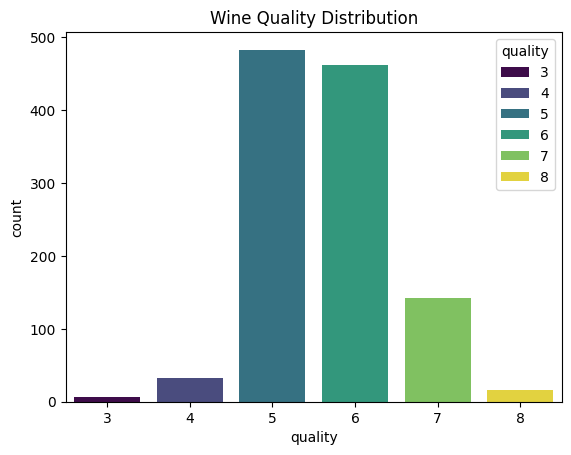

In [19]:
sns.countplot(x="quality", data=df, palette='viridis', hue="quality")
plt.title("Wine Quality Distribution")
plt.show()

In [25]:
print(df["quality"].value_counts().sort_index())

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [29]:
df=df.drop(columns=["Id"])

In [30]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


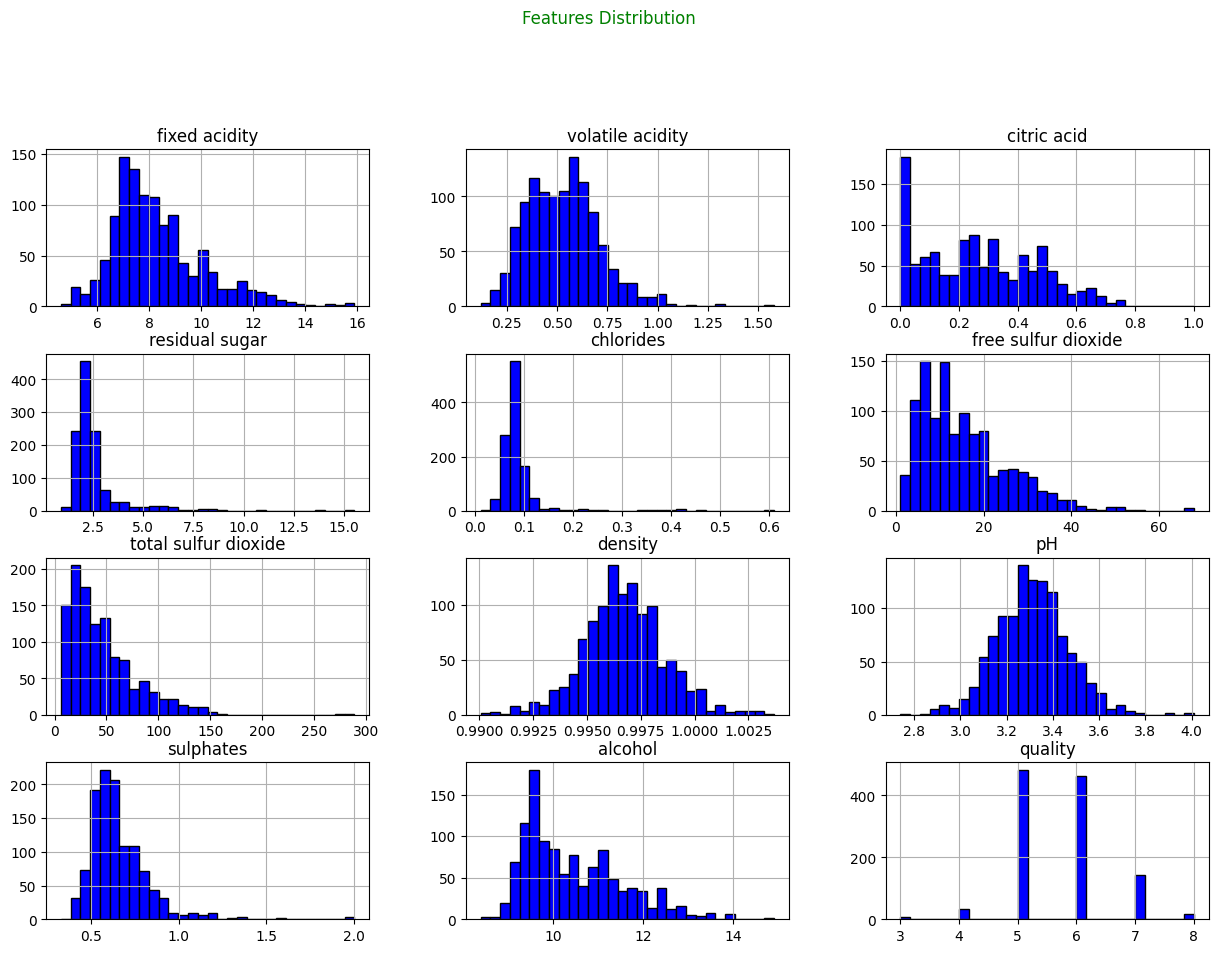

In [38]:
df.hist(bins=30, figsize=(15, 10), color="blue", edgecolor="black")
plt.suptitle("Features Distribution", y=1.02, color='green')
plt.show()

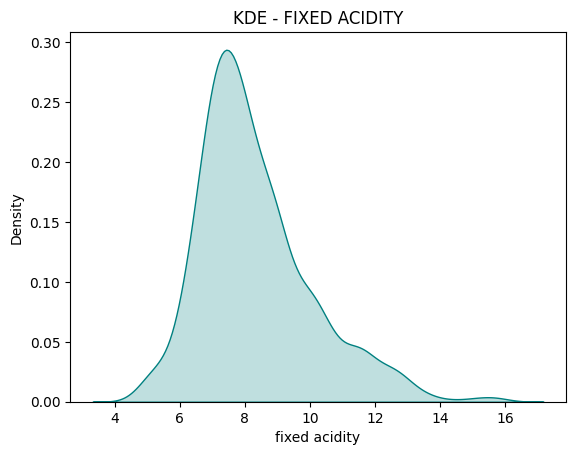

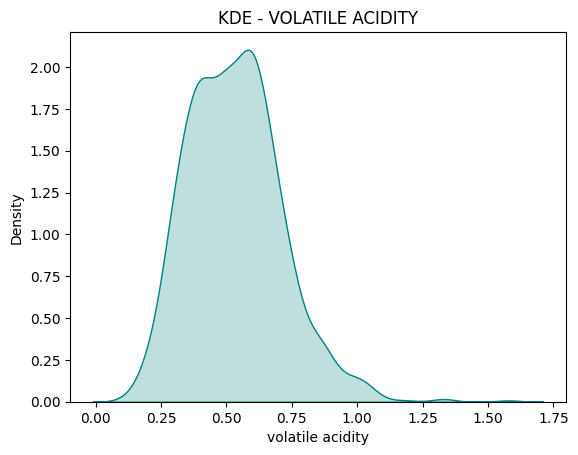

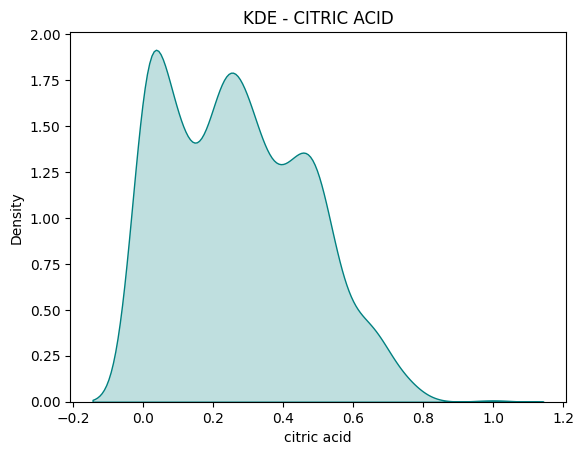

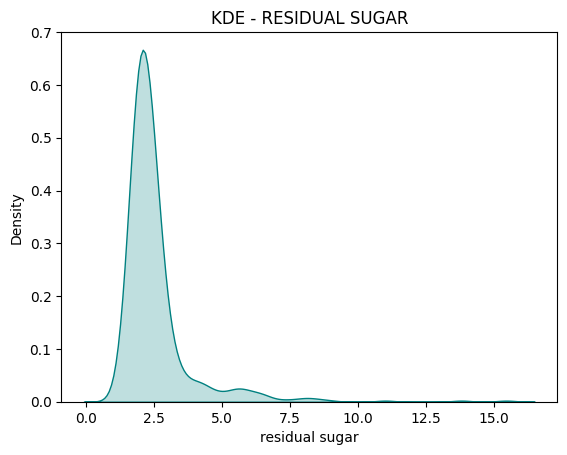

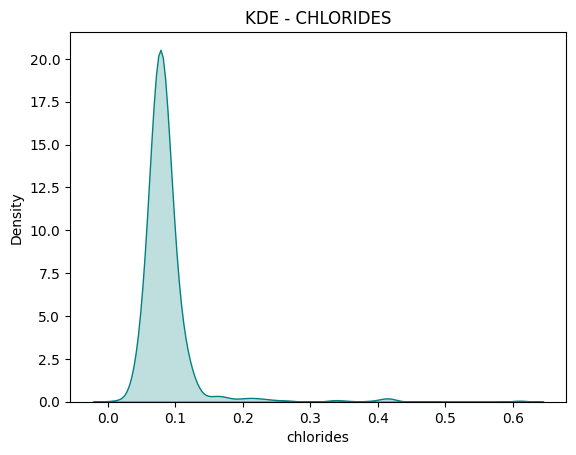

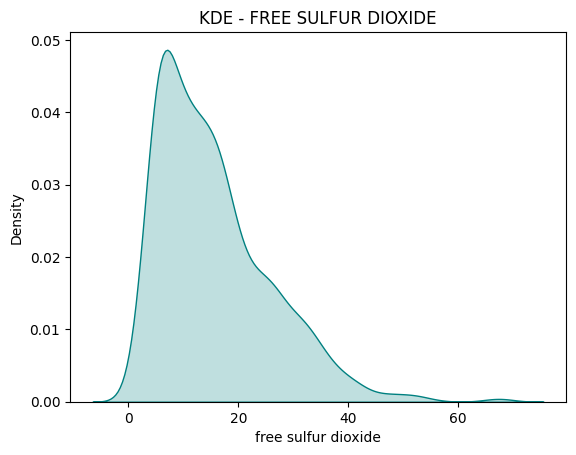

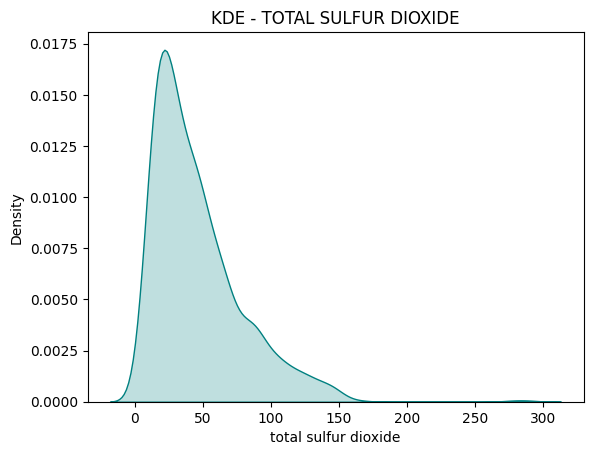

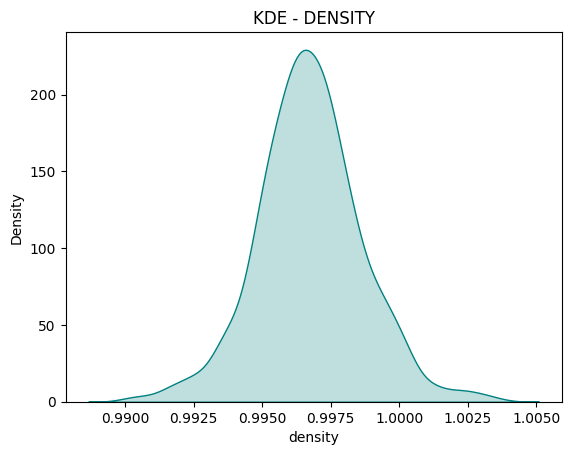

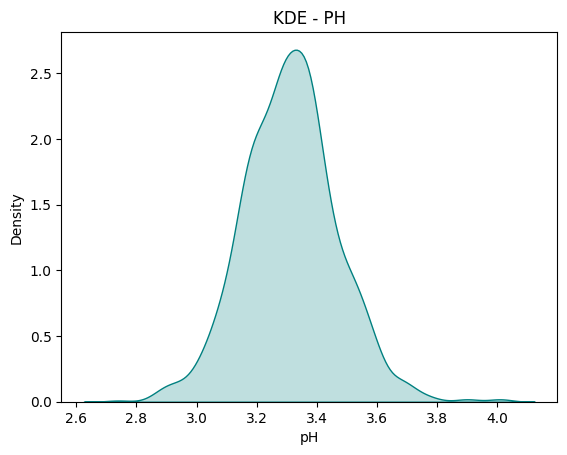

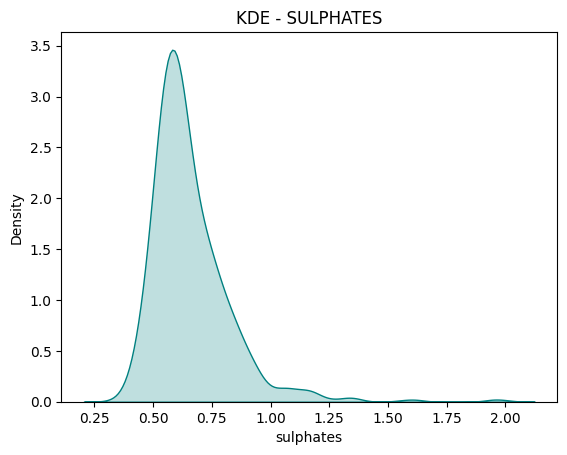

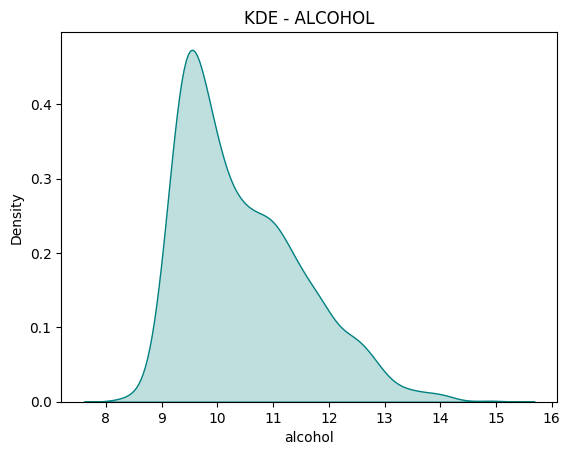

In [43]:
for col in df.drop(columns=["quality"]):
  sns.kdeplot(df[col], fill=True, color='teal')
  plt.title(f"KDE - {col.upper()}")
  plt.show()

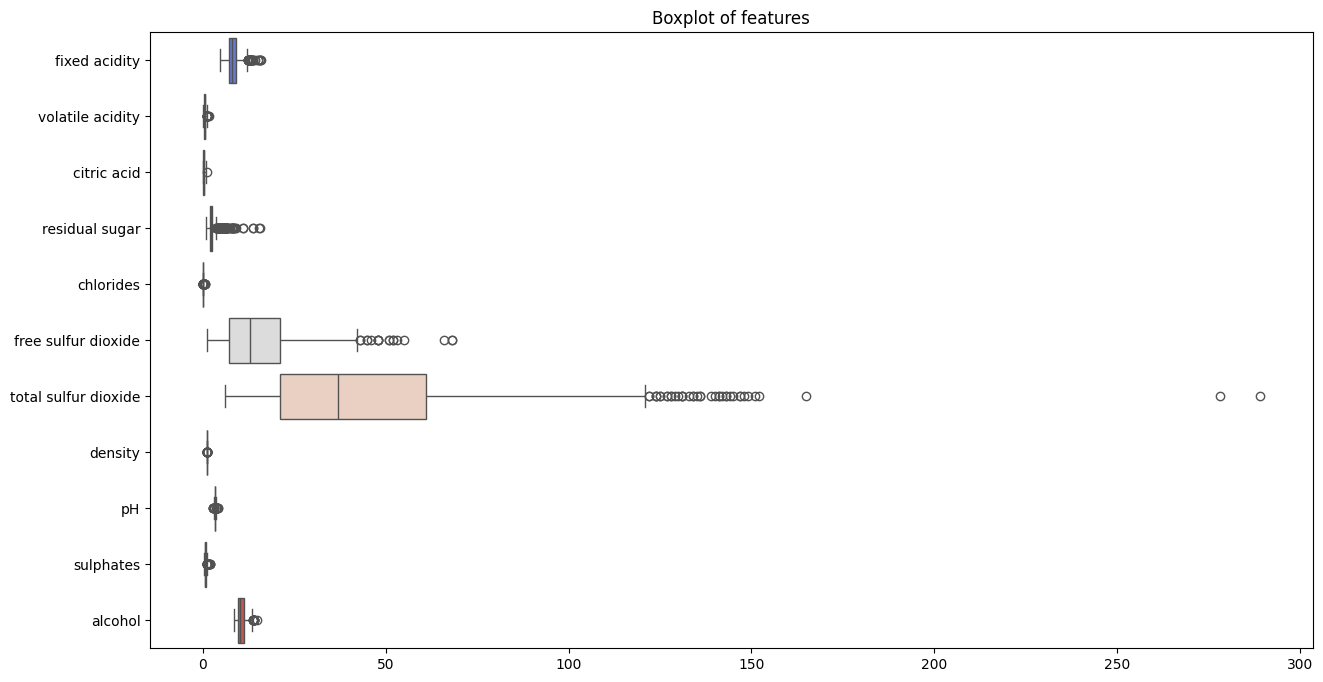

In [45]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["quality"]), orient="h", palette="coolwarm")
plt.title("Boxplot of features")
plt.show()

In [46]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

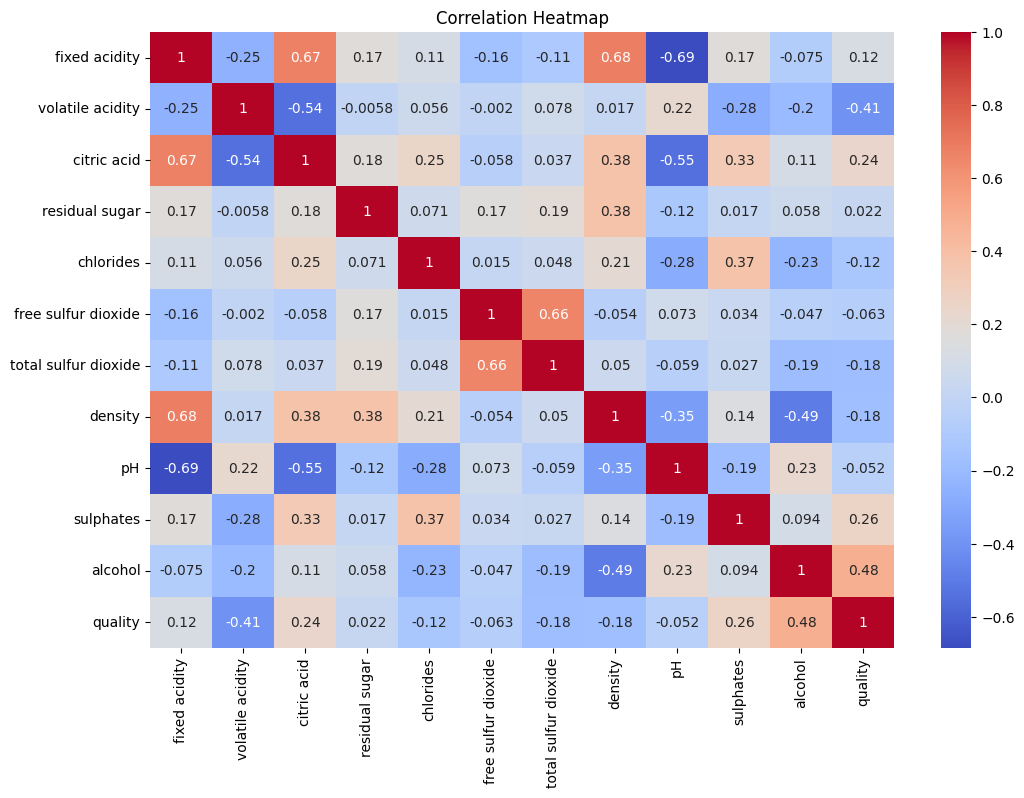

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

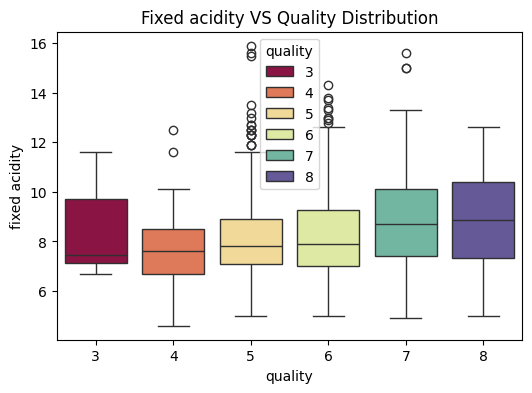

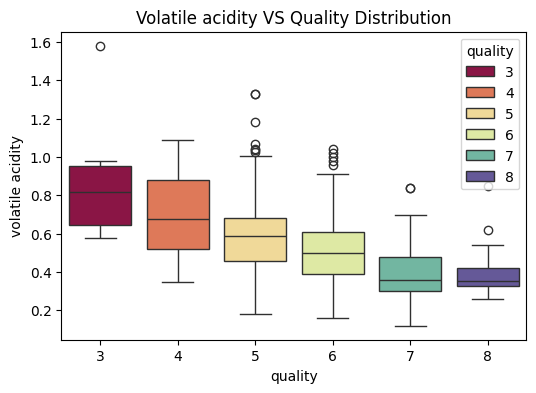

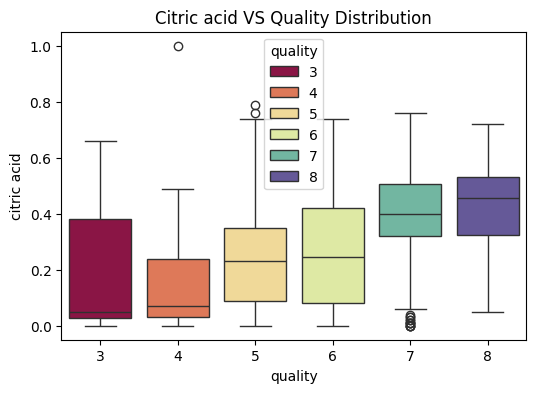

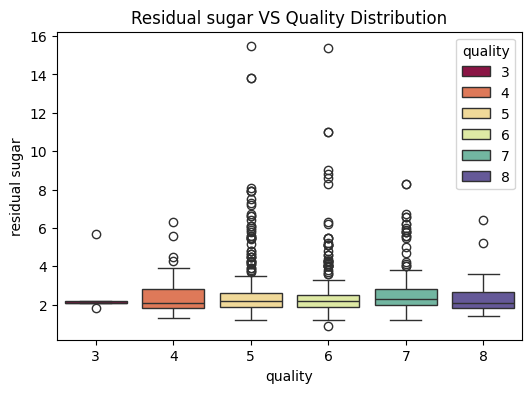

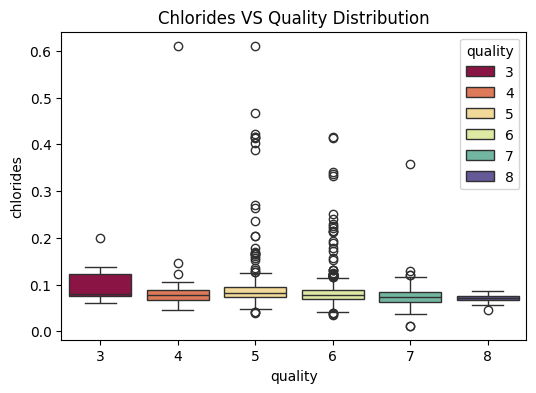

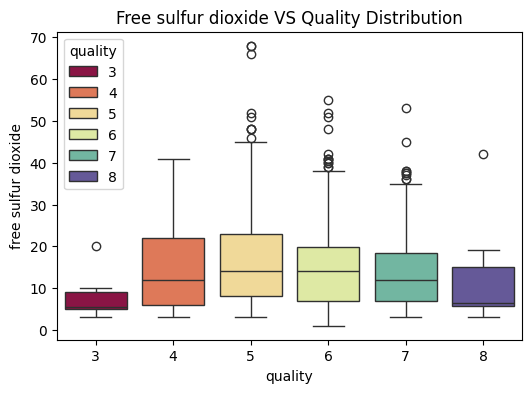

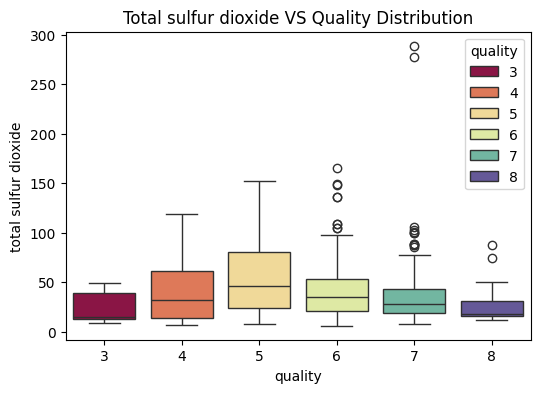

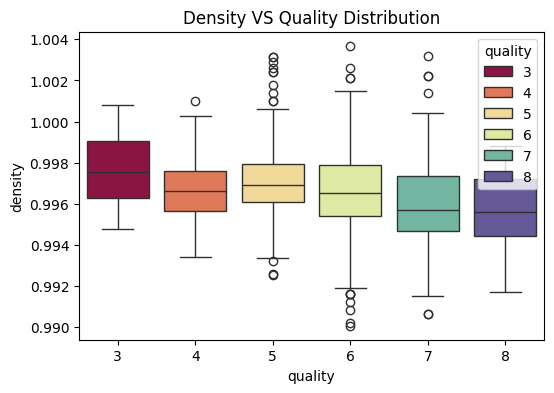

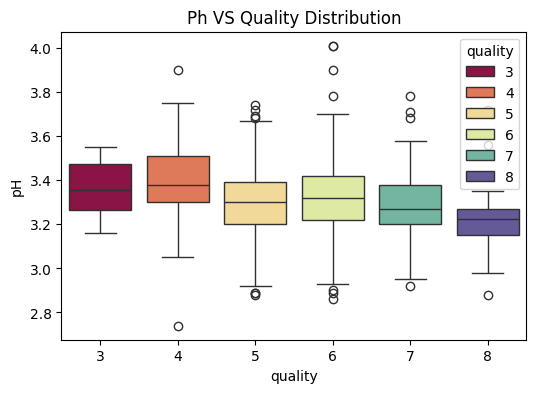

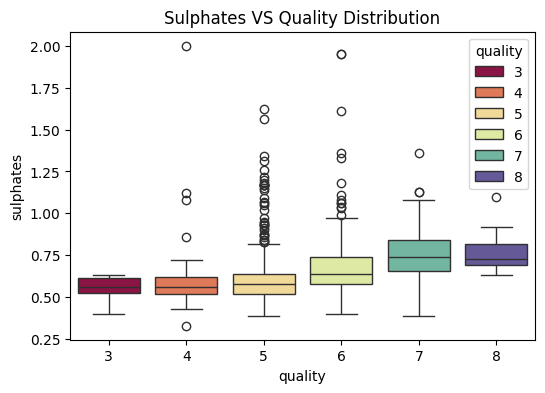

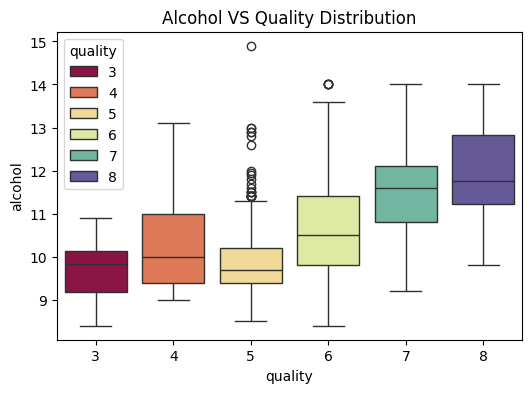

In [51]:
for col in df.drop(columns=["quality"]):
  plt.figure(figsize=(6, 4))
  sns.boxplot(x="quality", y=col, data=df, palette="Spectral", hue="quality")
  plt.title(f"{col.capitalize()} VS Quality Distribution")
  plt.show()

In [53]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Outliers=df[(df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))]


In [56]:
print(Outliers.count())

fixed acidity            44
volatile acidity         14
citric acid               1
residual sugar          110
chlorides                77
free sulfur dioxide      18
total sulfur dioxide     40
density                  36
pH                       20
sulphates                43
alcohol                  12
quality                  22
dtype: int64


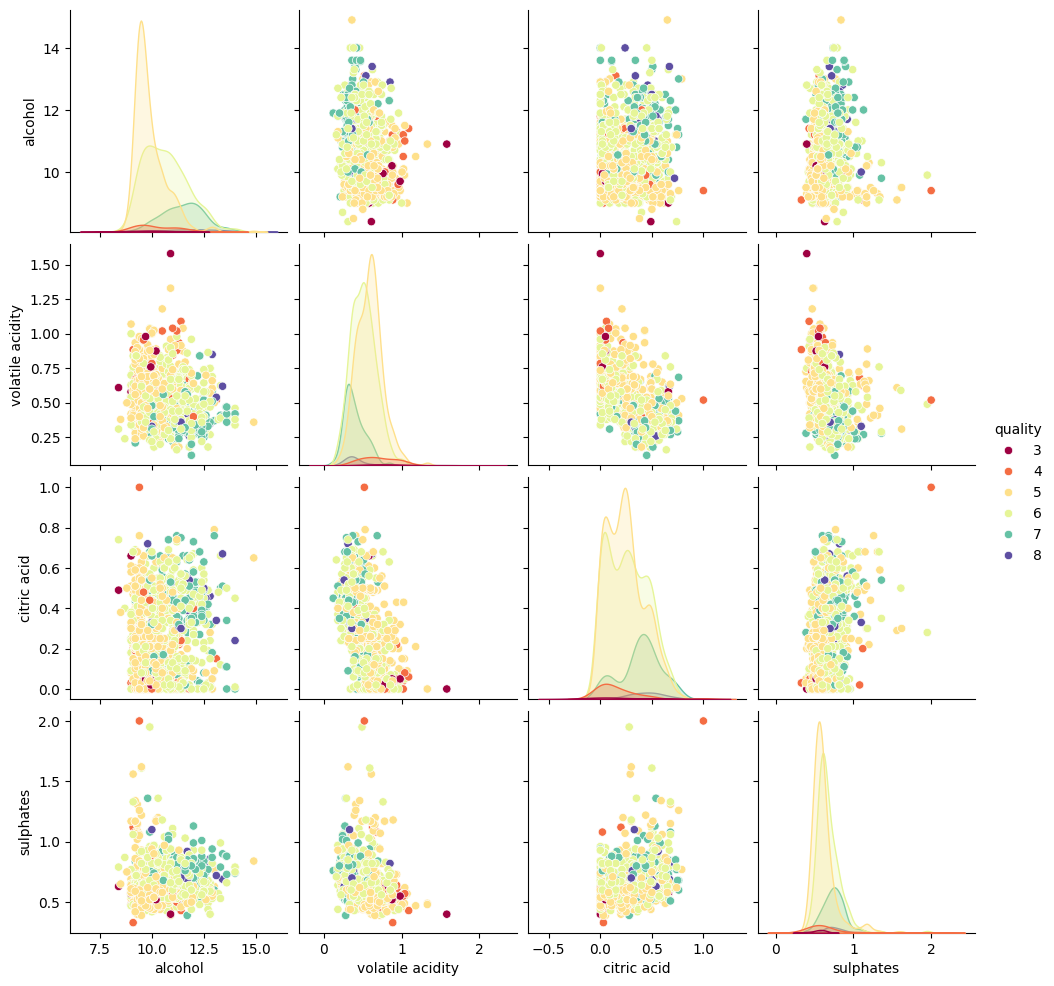

In [57]:
sns.pairplot(df[["alcohol", "volatile acidity", "citric acid", "sulphates", "quality"]],
             hue="quality", palette="Spectral", diag_kind="kde")

In [58]:
low_qual=df[df["quality"]<=5]
high_qual=df[df["quality"]>=6]

In [60]:
print(len(low_qual))
print(len(high_qual))

522
621


In [61]:
import numpy as np
from scipy.stats import ttest_ind

In [64]:
tstats_value={}

for col in df.drop(columns=["quality"]):
  t_stat, p_value=ttest_ind(low_qual[col], high_qual[col], equal_var=False)
  tstats_value[col]={"t_stat": t_stat,"p_val": p_value.round(6)}




In [65]:
print(tstats_value)

{'fixed acidity': {'t_stat': np.float64(-3.0531499380069804), 'p_val': np.float64(0.002317)}, 'volatile acidity': {'t_stat': np.float64(11.72903335187483), 'p_val': np.float64(0.0)}, 'citric acid': {'t_stat': np.float64(-5.350666527925451), 'p_val': np.float64(0.0)}, 'residual sugar': {'t_stat': np.float64(0.2591997668324718), 'p_val': np.float64(0.795531)}, 'chlorides': {'t_stat': np.float64(3.309594620636388), 'p_val': np.float64(0.000972)}, 'free sulfur dioxide': {'t_stat': np.float64(2.364418139118415), 'p_val': np.float64(0.01824)}, 'total sulfur dioxide': {'t_stat': np.float64(7.688332020420257), 'p_val': np.float64(0.0)}, 'density': {'t_stat': np.float64(5.380900568209006), 'p_val': np.float64(0.0)}, 'pH': {'t_stat': np.float64(-0.5159172923463019), 'p_val': np.float64(0.606015)}, 'sulphates': {'t_stat': np.float64(-8.093155629632031), 'p_val': np.float64(0.0)}, 'alcohol': {'t_stat': np.float64(-17.067079800674428), 'p_val': np.float64(0.0)}}


In [67]:
tstats_df=pd.DataFrame(tstats_value)

In [69]:
tstats_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
t_stat,-3.053150,11.729033,-5.350667,0.259200,3.309595,2.364418,7.688332,5.380901,-0.515917,-8.093156,-17.06708
p_val,0.002317,0.000000,0.000000,0.795531,0.000972,0.018240,0.000000,0.000000,0.606015,0.000000,0.00000


In [70]:
print(tstats_df.T)

                         t_stat     p_val
fixed acidity         -3.053150  0.002317
volatile acidity      11.729033  0.000000
citric acid           -5.350667  0.000000
residual sugar         0.259200  0.795531
chlorides              3.309595  0.000972
free sulfur dioxide    2.364418  0.018240
total sulfur dioxide   7.688332  0.000000
density                5.380901  0.000000
pH                    -0.515917  0.606015
sulphates             -8.093156  0.000000
alcohol              -17.067080  0.000000
